## Machine Learning Foundation & Techniques: Assignment 1

### Perceptron Learning Algorithm (PLA) (HW1, Q15-17)

In [1]:
import numpy as np

def GetData(filename):
    """Read data and generate parameters."""
    
    file = open(filename,'r')
    hw1_data = []
    for line in file:
        data = [float(i) for i in file.readline().split()]
        data.insert(0,1)
        hw1_data.append(data)
    
    X = []
    Y = []
    for data in hw1_data:
        X.append(data[0:5])
        Y.append(data[5])
    
    X = np.array(X)
    Y = np.array(Y)
    
    return X,Y


def Sign(X,W):
    """ Hypothesis of PLA: h(X) = Sign(X * W.T) 
        X[i] dimension is (1, 5) & W dimension is (1, 5). """
    if np.dot(X, W.T) > 0:
        return 1
    else:
        return -1

In [2]:
def naive_PLA(X, Y, updates):
    """ PLA by visiting examples in the naive cycle using the order of examples in the data set. """
    n = len(X[0])
    W = np.zeros((1,n))
    
    for iteration in range(updates):
        # algorithm halts if PLA has visited all data point, otherwise Flase
        halt = True
        
        # visit each data (index by i) in a naive cycle using the order of examples in the data set
        for i in range(len(X)):
            # update new W if the hypothesis is wrong
            if Sign(X[[i]], W) != Y[i]:      # shape of X[i] is (5, ), meaning that it contains 1 list
                W = W + Y[i]*X[i]            # convert X[i] into a list (i.e. X[[i]]) to solve the dimension problem 
                halt = False                 # keep updating the algorithm, do not halt
                break
        
        # stop updating if PLA has visited all data point, algorithm halts
        if halt == True:
            break
        
    return W, iteration

In [3]:
import random

def random_PLA(X, Y, updates, eta):
    """ PLA by visiting examples in fixed, pre-determined random cycles throughout the algorithm. """
    n = len(X[0])
    W = np.zeros((1,n))
    
    for iteration in range(updates):
        # algorithm halts if PLA has visited all data point, otherwise Flase
        halt = True
        
        # visit each data (index by i) in a fixed, pre-determined random cycle
        n = len(X)
        indices = random.sample(range(n), n)
        for i in indices:
            # update new W if the hypothesis is wrong
            if Sign(X[[i]], W) != Y[i]:      # shape of X[i] is (5, ), meaning that it contains 1 list
                W = W + eta*Y[i]*X[i]            # convert X[i] into a list (i.e. X[[i]]) to solve the dimension problem 
                halt = False                 # keep updating the algorithm, do not halt
                break
        
        # stop updating if PLA has visited all data point, algorithm halts
        if halt == True:
            break
        
    return W, iteration

In [4]:
def UpdateNum(X, Y, updates, eta, experiments):
    """ Repeat the experiment and get the number of updates before the algorithm hatls.
        Store the number in a list for plotting the histogram."""
    
    num_updates = []
    for i in range(experiments):
        random = random_PLA(X,Y,updates,eta)
        num_updates.append(random[1])
    
    num_updates = np.array(num_updates)
    return num_updates

In [5]:
filename = 'data/hw1_15_train.dat.txt'
X, Y = GetData(filename)
updates = 100

naive = naive_PLA(X,Y,updates)

In [6]:
# the number of updates before the algorithm halts under naive PLA
naive[1]

32

In [7]:
# the average number of updates before the algorithm halts under random PLA with eta = 1
eta = 1
experiments = 2000

num_updates = UpdateNum(X,Y,updates,eta,experiments)
num_updates.mean()

34.146000000000001

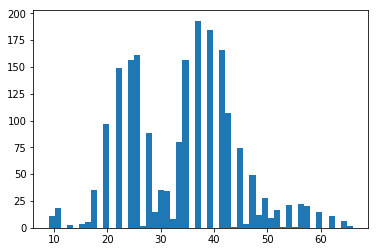

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

num_updates = np.array(num_updates)
plt.hist(num_updates, bins = 50);

In [11]:
# the average number of updates before the algorithm halts under random PLA with eta = 0.5
eta = 0.5

num_updates = UpdateNum(X, Y, updates, eta, experiments)
num_updates.mean()

33.866500000000002

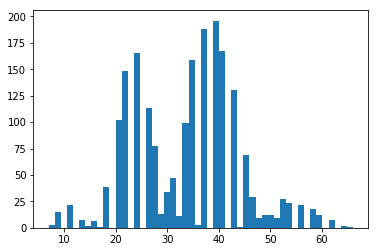

In [12]:
num_updates = np.array(num_updates)
plt.hist(num_updates, bins = 50);

### Pocket PLA (HW1, Q18-20)

In [13]:
def Test(X,Y,W):
    """0/1 error"""
    n = len(X)
    error = [1 for i in range(n) if Sign(X[i], W) != Y[i]]
    sum_error = np.array(error).sum()
    return sum_error / float(n)


def PocketPLA(X,Y,updates,eta):
    n = len(X[0])
    W = np.zeros((1,n))
    
    # set a pocket: update minimum error if a smaller error is obtained and keep the best W in the pocket
    min_error = Test(X,Y,W) 
    W_pocket = W
    
    for iteration in range(updates):
        
        # visit each data (index by i) in a fixed, pre-determined random cycle
        n = len(X)
        indices = random.sample(range(n), n)
        
        for i in indices:
            # update new W if the hypothesis is wrong 
            if Sign(X[[i]], W) != Y[i]:      # shape of X[i] is (5, ), meaning that it contains 1 list
                W = W + eta*Y[i]*X[i]        # convert X[i] into a list (i.e. X[[i]]) to solve the dimension problem 
                error = Test(X,Y,W)          
                if error < min_error:
                    min_error = error        # update mininum error when obtaining a smaller error
                    W_pocket = W             # update W
                    break
        
    return W_pocket

In [15]:
filename = 'data/hw1_18_train.dat.txt'
X,Y= GetData(filename)
updates = 50
eta = 1

testfile = 'data/hw1_18_test.dat.txt'
X_test, Y_test = GetData(testfile)
experiments = 2000

avg_error = []
for i in range(experiments):
    W_pocket = PocketPLA(X,Y,updates,eta)
    error = Test(X_test,Y_test,W_pocket)
    avg_error.append(error)
    
    if i%100 == 0:
        print('experiment: %d' %(i+1))

experiment: 1
experiment: 101
experiment: 201
experiment: 301


KeyboardInterrupt: 

In [62]:
np.array(avg_error).mean()

0.10569800000000004

1

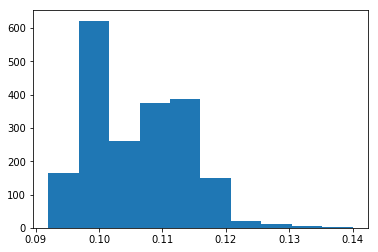

In [59]:
plt.hist(avg_error, bins = 10)
1

In [63]:
def W50PLA(X,Y,updates,eta):
    n = len(X[0])
    W = np.zeros((1,n))
    
    for iteration in range(updates):
        
        # visit each data (index by i) in a fixed, pre-determined random cycle
        n = len(X)
        indices = random.sample(range(n), n)
        
        for i in indices:
            # update new W if the hypothesis is wrong 
            if Sign(X[[i]], W) != Y[i]:      # shape of X[i] is (5, ), meaning that it contains 1 list
                W = W + eta*Y[i]*X[i]        # convert X[i] into a list (i.e. X[[i]]) to solve the dimension problem 
        
    return W

In [70]:
experiments = 1000

W50_avg_error = []
for i in range(experiments):
    W = W50PLA(X,Y,updates,eta)
    error = Test(X_test,Y_test,W_pocket)
    W50_avg_error.append(error)
    
    if i%10 == 0:
        print('experiment: %d' %(i+1))

experiment: 1
experiment: 11
experiment: 21
experiment: 31
experiment: 41
experiment: 51
experiment: 61
experiment: 71
experiment: 81
experiment: 91
experiment: 101
experiment: 111
experiment: 121
experiment: 131
experiment: 141
experiment: 151
experiment: 161
experiment: 171
experiment: 181
experiment: 191
experiment: 201
experiment: 211
experiment: 221
experiment: 231
experiment: 241
experiment: 251
experiment: 261
experiment: 271
experiment: 281
experiment: 291
experiment: 301
experiment: 311
experiment: 321
experiment: 331
experiment: 341
experiment: 351
experiment: 361
experiment: 371
experiment: 381
experiment: 391
experiment: 401
experiment: 411
experiment: 421
experiment: 431
experiment: 441
experiment: 451
experiment: 461
experiment: 471
experiment: 481
experiment: 491
experiment: 501
experiment: 511
experiment: 521
experiment: 531
experiment: 541
experiment: 551
experiment: 561
experiment: 571
experiment: 581
experiment: 591
experiment: 601
experiment: 611
experiment: 621
exp

In [69]:
np.array(W50_avg_error).mean()

0.10800000000000003